In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

In [46]:
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
data = pd.read_csv("Downloads/adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

In [7]:
info = pd.DataFrame(data.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",data.isna().sum(),True)
info.insert(2,"Duplicate",data.duplicated().sum(),True)
info.insert(3,"Unique",data.nunique(),True)
info.insert(4,"Min",data.min(),True)
info.insert(5,"Max",data.max(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2
Min,17,NaN,12285,10th,1,Divorced,NaN,Husband,Amer-Indian-Eskimo,Female,0,0,1,NaN,<=50K
Max,90,NaN,1490400,Some-college,16,Widowed,NaN,Wife,White,Male,99999,4356,99,NaN,>50K


In [9]:
df = data.copy()

In [11]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df = df.drop_duplicates()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

In [17]:
from sklearn import preprocessing

In [19]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=123)
train_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
27716,56,Federal-gov,155238,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,>50K
34819,36,Private,123983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,55,Japan,>50K
6791,63,Local-gov,197189,Bachelors,Widowed,Prof-specialty,Not-in-family,White,Female,48,United-States,<=50K
30798,43,Self-emp-not-inc,32451,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
19250,27,Private,85625,Some-college,Never-married,Sales,Not-in-family,White,Male,20,United-States,<=50K


In [21]:
X_test_original = test_df.copy()

In [23]:
num_feats = ["age","fnlwgt","hours-per-week"]
cat_feats = ["workclass","education","marital-status","occupation","relationship","race","gender"]
target_col    = "income"

In [25]:
# cat_cols = [
#     'gender', 'workclass', 'education', 'marital-status',
#     'occupation', 'relationship', 'race', 'native-country',
#     'income'
# ]

# # 3. Create a LabelEncoder per column, fit on train, transform both
# encoders = {}
# for col in cat_cols:
#     le = LabelEncoder()
#     # fit on train
#     train_df[col] = le.fit_transform(train_df[col])
#     # use same encoder to transform test
#     test_df[col] = le.transform(test_df[col])
#     encoders[col] = le  # if you need them later

In [27]:
cat_feats = df.select_dtypes(include=['object', 'category']).columns.tolist()
# if target_col in cat_feats:
#     cat_feats.remove(target_col)
num_feats = [c for c in df1.columns if c != target_col and c not in cat_feats]


In [29]:
num_feats

['age', 'fnlwgt', 'hours-per-week']

In [31]:
cat_categories = {
    col: train_df[col].astype('category').cat.categories.tolist()
    for col in cat_feats
}
cat_dims = [len(cat_categories[c]) for c in cat_feats]
for col in cat_feats:
    train_df[col] = train_df[col].astype('category').cat.codes
    test_df[col]  = pd.Categorical(test_df[col], categories=cat_categories[col]).codes


In [33]:
scaler    = StandardScaler().fit(train_df[num_feats])
train_num = scaler.transform(train_df[num_feats])
test_num  = scaler.transform(test_df[num_feats])


In [36]:
X_train_num = train_num
X_test_num  = test_num
X_train_cat = train_df[cat_feats].values.astype(int)
X_test_cat  = test_df[cat_feats].values.astype(int)
y_train     = train_df[target_col].values.astype(float)
y_test      = test_df[target_col].values.astype(float)


In [38]:
class TabularDataset(Dataset):
    def __init__(self, X_num, X_cat, y):
        self.X_num = torch.from_numpy(X_num).float()
        self.X_cat = torch.from_numpy(X_cat).long()
        self.y     = torch.from_numpy(y).float().unsqueeze(1)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X_num[idx], self.X_cat[idx], self.y[idx]


In [40]:
batch_size = 32
train_ds = TabularDataset(X_train_num, X_train_cat, y_train)
test_ds  = TabularDataset(X_test_num,  X_test_cat,  y_test)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=batch_size)


In [42]:
class TabTransformerClassifier(nn.Module):
    def __init__(self, num_feats, cat_dims, d_model=32, n_heads=4, n_layers=2, dropout=0.1):
        super().__init__()
        # numeric ↦ embedding
        self.num_embeds = nn.ModuleList([nn.Linear(1, d_model) for _ in range(num_feats)])
        # categorical ↦ embedding
        self.cat_embeds = nn.ModuleList([nn.Embedding(dim, d_model) for dim in cat_dims])
        # positional/field embeddings
        total = num_feats + len(cat_dims)
        self.pos_embed = nn.Parameter(torch.randn(total, d_model))
        # transformer encoder
        enc_layer = nn.TransformerEncoderLayer(d_model, n_heads, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(enc_layer, num_layers=n_layers)
        # classification head
        self.classifier = nn.Linear(d_model, 1)

    def forward(self, x_num, x_cat):
        num_tokens = [emb(x_num[:, i].unsqueeze(-1)) for i, emb in enumerate(self.num_embeds)]
        cat_tokens = [emb(x_cat[:, i]) for i, emb in enumerate(self.cat_embeds)]
        tokens = torch.stack(num_tokens + cat_tokens, dim=1)          # [B, total, d_model]
        tokens = tokens + self.pos_embed.unsqueeze(0)
        out = self.transformer(tokens)                                # [B, total, d_model]
        rep = out.mean(dim=1)                                         # [B, d_model]
        return self.classifier(rep)                                   # [B, 1] logits


In [48]:
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model     = TabTransformerClassifier(len(num_feats), cat_dims).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs    = 20

In [50]:
for ep in range(1, epochs+1):
    model.train()
    total_loss = 0.0
    for x_num, x_cat, y in train_dl:
        x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x_num, x_cat)
        loss   = criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * y.size(0)
    print(f"Epoch {ep}/{epochs} — Train Loss: {total_loss/len(train_dl.dataset):.4f}")


Epoch 1/20 — Train Loss: 0.0144
Epoch 2/20 — Train Loss: 0.0001
Epoch 3/20 — Train Loss: 0.0000
Epoch 4/20 — Train Loss: 0.0000
Epoch 5/20 — Train Loss: 0.0000
Epoch 6/20 — Train Loss: 0.0000
Epoch 7/20 — Train Loss: 0.0000
Epoch 8/20 — Train Loss: 0.0000
Epoch 9/20 — Train Loss: 0.0000
Epoch 10/20 — Train Loss: 0.0000
Epoch 11/20 — Train Loss: 0.0000
Epoch 12/20 — Train Loss: 0.0000
Epoch 13/20 — Train Loss: 0.0000
Epoch 14/20 — Train Loss: 0.0000
Epoch 15/20 — Train Loss: 0.0000
Epoch 16/20 — Train Loss: 0.0000
Epoch 17/20 — Train Loss: 0.0000
Epoch 18/20 — Train Loss: 0.0000
Epoch 19/20 — Train Loss: 0.0000
Epoch 20/20 — Train Loss: 0.0000


In [52]:
model.eval()
all_logits, all_labels = [], []
with torch.no_grad():
    for x_num, x_cat, y in test_dl:
        x_num, x_cat = x_num.to(device), x_cat.to(device)
        logits = model(x_num, x_cat).cpu()
        all_logits.append(logits)
        all_labels.append(y)
all_logits = torch.vstack(all_logits).squeeze()
all_labels = torch.vstack(all_labels).squeeze()


In [54]:
probs = torch.sigmoid(all_logits)
preds = (probs > 0.5).long()

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


In [64]:
predictions_df = pd.DataFrame({'Predicted_Label': preds})

In [66]:
merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [68]:
merged_df.drop('income', axis=1, inplace=True)

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

In [74]:
import pandas as pd
import numpy as np
# from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt

In [76]:
categorical_features = ["workclass", "education", "marital-status","occupation","relationship","race","gender","native-country"]
target = "Predicted_Label"

In [78]:
numeric_features = [c for c in merged_df.columns 
    if c not in categorical_features and c != target]

In [80]:
def cramers_v(conf_mat):
    chi2, _, _, _ = chi2_contingency(conf_mat)
    n = conf_mat.values.sum()
    r, k = conf_mat.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [82]:
records = []

In [84]:
for feat in numeric_features:
    r, p = pointbiserialr(merged_df[feat], merged_df[target])
    if p < 0.05:
        records.append({'Feature': feat,
                'Type': 'numeric',
                'p_value': p,
                'effect_size': abs(r)
            })

for feat in categorical_features:
    conf = pd.crosstab(merged_df[feat], merged_df[target])
    chi2_stat, p, _, _ = chi2_contingency(conf)
    if p < 0.05:
        v = cramers_v(conf)
        records.append({'Feature': feat,
                'Type': 'categorical',
                'p_value': p,
                'effect_size': v
            })

In [86]:
if not records:
    print("No features reached p < 0.05.")
else:
    eff_df = pd.DataFrame(records)
    eff_df = eff_df.sort_values('effect_size', ascending=False).reset_index(drop=True)
    
    # 5. Display ranked features
    display(eff_df[['Feature', 'Type', 'p_value', 'effect_size']])

,Feature,Type,p_value,effect_size
0,relationship,categorical,0.000000e+00,0.448321
1,marital-status,categorical,0.000000e+00,0.439367
2,education,categorical,5.155845e-245,0.363380
3,occupation,categorical,6.797858e-221,0.344412
4,age,numeric,7.326743e-117,0.238307
5,hours-per-week,numeric,6.507368e-101,0.221596
6,gender,categorical,7.734996e-95,0.217366
7,workclass,categorical,1.164861e-37,0.143824
8,native-country,categorical,1.658379e-08,0.109720
9,race,categorical,8.932755e-17,0.094900


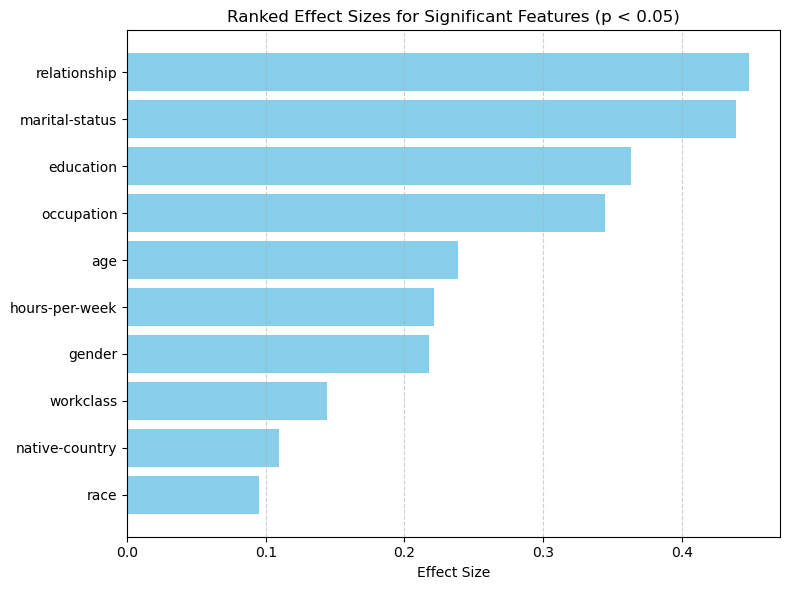

In [88]:
plt.figure(figsize=(8, 6))
plt.barh(eff_df['Feature'], eff_df['effect_size'], color='skyblue')
plt.xlabel("Effect Size")
plt.title("Ranked Effect Sizes for Significant Features (p < 0.05)")
plt.gca().invert_yaxis()  # largest effect at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()